# HW1 Nicholas Welsh
## MTH 5320 Deep Learning


### 1A. Naïve Matrix Multiplication - 5 pts

In [1]:
import numpy as np

matrix = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
matrix2 = np.array([[2,3],
                    [9,3],
                    [8,3]])

def MatrixMultiplication(A, B):
    # determine if column of first matrix is equal to row of second matrix
    if(A.shape[1] == B.shape[0]):
        # make final array's shape equal to the rows of the first matrix and columns of the second matrix
        finalArr = np.zeros((A.shape[0],B.shape[1]), dtype=int)
        # get the rows of the first matrix
        for i in range(A.shape[0]):
            # get the columns of the first matrix
            for j in range(A.shape[1]):
                # get the columns of the second matrix
                for k in range(B.shape[1]):
                    # for each column of final matrix, add the product of both matricies
                    finalArr[i][k] += (A[i][j] * B[j][k])

        return finalArr
    else:
        print("wrong")
        return

    

In [2]:
# Finding the relative Frobenius norm error averaged over 10 random matrix pairs
rng = np.random.default_rng()

for i in range(10):
    randomMatrix1 = rng.integers(low=1, high=100, size=(2,3))
    randomMatrix2 = rng.integers(low=1, high=100, size=(3,2))
    C_loops = MatrixMultiplication(randomMatrix1, randomMatrix2)
    C_numpy = randomMatrix1 @ randomMatrix2
    num = np.linalg.norm((C_loops - C_numpy), ord='fro')
    denom = np.linalg.norm(C_numpy, ord='fro')
    print(f'Iteration {i+1}: {num/denom}')
    

Iteration 1: 0.0
Iteration 2: 0.0
Iteration 3: 0.0
Iteration 4: 0.0
Iteration 5: 0.0
Iteration 6: 0.0
Iteration 7: 0.0
Iteration 8: 0.0
Iteration 9: 0.0
Iteration 10: 0.0


In [3]:
# Finding the relative Frobenius norm error averaged over 10 random matrix pairs
import time

rng = np.random.default_rng()

A = rng.integers(low=1, high=100, size=(200, 200))
B = rng.integers(low=1, high=100, size=(200, 200))

repeats = 10
loop_times = []
numpy_times = []

for _ in range(repeats):
    start = time.perf_counter()
    MatrixMultiplication(A, B)
    loop_times.append(time.perf_counter() - start)

    start = time.perf_counter()
    A @ B
    numpy_times.append(time.perf_counter() - start)

# compute averages manually
avg_loop = sum(loop_times) / repeats
avg_numpy = sum(numpy_times) / repeats

print(f"Average loops time: {avg_loop:.6f} seconds")
print(f"Average NumPy time: {avg_numpy:.6f} seconds")
    

Average loops time: 2.516601 seconds
Average NumPy time: 0.003538 seconds


# Reasoning for NumPy's speed
From research, it seems that NumPy uses a highly optimized algorithm that is different to our naïve applications. \
Runtime complexity of the naïve algorithm is O(n^3), while NumPy uses a custom algorithm dubbed "BLAS GEMM (General Matrix Multiply)". This is still a O(n^3) algorithm but runs slightly faster than our approach because of optimizations made inside the algorithm.

### 1B. Train / Val / Test Split - 5 pts

In [4]:
def train_val_test_split(X, y, ratios=(0.7,0.15,0.15), seed=5320):
    # Validates inputs and catched ill-formed inputs
    if (X.shape[0] != y.shape[0]):
        print("WRONG")
        return
        
    # shuffle indices reproducibly
    n = len(X)
    np.random.seed(seed)
    indices = np.arange(n)
    np.random.shuffle(indices)
    

    # preserving X/y alignment by telling how many samples go into each split
    n_test = int(n * ratios[2])
    n_val = int(n * ratios[1])
    n_train = n - n_val - n_test

    # indices belonging to each split
    train_idx = indices[0 : n_train]
    val_idx = indices[n_train : n_train + n_val]
    test_idx = indices[n_train + n_val : ]

    if (len(train_idx) + len(val_idx) + len(test_idx) == n):
        print("good")


    # Splits without overlap
    Xtrain = X[train_idx]
    ytrain = y[train_idx]
    Xval = X[val_idx]
    yval = y[val_idx]
    Xtest = X[test_idx]
    ytest = y[test_idx]
    
    return Xtrain, ytrain, Xval, yval, Xtest, ytest

In [5]:
# testing the function on MNIST dataset 
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

X, y = mnist['data'], mnist['target']

Xtr, ytr, Xval, yval, Xte, yte = train_val_test_split(X, y, seed=0)


good


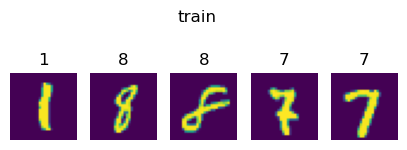

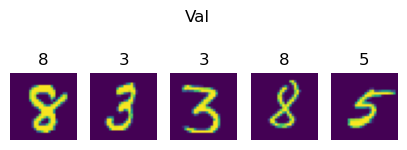

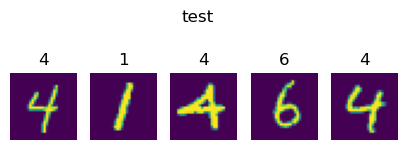

In [6]:
# plotting 5 random images from each X subset with labels
import matplotlib.pyplot as plt

def showImg(X, y, title, seed=5320):
    rng = np.random.default_rng(seed)
    idx = rng.choice(len(X), 5, replace=False)
    fig, axes = plt.subplots(1, 5, figsize=(5, 2))
    for ax, i in zip(axes, idx):
        ax.imshow(X[i].reshape(28,28))
        ax.set_title(str(y[i]))
        ax.axis("off")
    fig.suptitle(title); plt.show()

showImg(Xtr, ytr, "train")
showImg(Xval, yval, "Val")
showImg(Xte, yte, "test")


### 1C. Implement a Mini Standardizer - 5 pts

To handle with zero-variance, one of the methods I researched is implementing a small epsilon to make sure the variance is never zero (self.scale is never 0)
-new: if variance < 1.0 then set it equal to 1.0

In [7]:
class StandardScaler:
    def __init__(self, with_mean=True, with_std=True):
        self.with_mean = bool(with_mean)
        self.with_std = bool(with_std)
        
    def fit(self, X):
        # set self.mean, self.scale vectors
        # more code here?
        self.mean = X.mean(axis=0)
        self.scale = X.std(axis=0)
        

    def transform(self, X):
        # handle zero-variance features safely
        # more code here?
        eps = 1e-12

        if self.with_mean:
            X_t = X - self.mean
        if self.with_std:
            safe_scale = np.maximum(self.scale, 1.0)
            X_t /= safe_scale
    
        return X_t

    def fit_transform(self, X):
        # more code here?
        return self.fit(X).transform(X)

In [8]:
# test with wisconsin breast cancer and MNIST datasets
from sklearn.datasets import load_breast_cancer

# call mnist and fit data/target
mnist = fetch_openml('mnist_784', as_frame=False)
X_mnist, y_mnist = mnist['data'], mnist['target']
# set target as integer
y_mnist = y_mnist.astype(int)

# call breast cancer dataset and fit data/target
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer['data'], cancer['target']


# set up train/val/test split for mnist and cancer datasets

Xtr_mnist, ytr_mnist, Xval_mnist, yval_mnist, Xte_mnist, yte_mnist = train_val_test_split(X_mnist, y_mnist, seed=5320)

Xtr_cancer, ytr_cancer, Xval_cancer, yval_cancer, Xte_cancer, yte_cancer = train_val_test_split(X_cancer, y_cancer, seed=5320)

# feed mnist and cancer datasets through standard scaler

sc_mnist = StandardScaler()
sc_mnist.fit(Xtr_mnist)
Xtr_mnist_std  = sc_mnist.transform(Xtr_mnist)
Xval_mnist_std = sc_mnist.transform(Xval_mnist)
Xte_mnist_std  = sc_mnist.transform(Xte_mnist)

sc_cancer = StandardScaler()
sc_cancer.fit(Xtr_cancer)
Xtr_cancer_std  = sc_cancer.transform(Xtr_cancer)
Xval_cancer_std = sc_cancer.transform(Xval_cancer)
Xte_cancer_std  = sc_cancer.transform(Xte_cancer)

# print the column means and standard deviations

def report_stats(name, X, full=False):
    mu = X.mean(axis=0)
    sd = X.std(axis=0, ddof=0)
    print(f"{name}:")
    if full:
        print("  means:", np.array2string(mu, precision=4, suppress_small=True))
        print("  stds :", np.array2string(sd, precision=4, suppress_small=True))
    print(f"  max|mean|={np.abs(mu).max():.3g},  std range=({sd.min():.3g}, {sd.max():.3g})\n")


report_stats("MNIST train", Xtr_mnist_std)
report_stats("MNIST val",   Xval_mnist_std)
report_stats("MNIST test",  Xte_mnist_std)

report_stats("Cancer train", Xtr_cancer_std)
report_stats("Cancer val",   Xval_cancer_std)
report_stats("Cancer test",  Xte_cancer_std)


good
good
MNIST train:
  max|mean|=9.89e-15,  std range=(0, 1)

MNIST val:
  max|mean|=0.0323,  std range=(0, 2.17)

MNIST test:
  max|mean|=0.0432,  std range=(0, 2.85)

Cancer train:
  max|mean|=4.97e-15,  std range=(0.00276, 1)

Cancer val:
  max|mean|=0.157,  std range=(0.00279, 1.24)

Cancer test:
  max|mean|=0.178,  std range=(0.0018, 1.59)



## Problem 2 - Matrix Calculus & Optimization
### 2A. Ridge (weight decay) Regression, Closed Form - 20 pts

In [15]:
class RidgeRegression: #do we need lam?? idk
    # fill in inputs and code (initializer with hyperparameters)
    def __init__(self, lam):
        self.lam = float(lam)
        self.w = None

    # fill in inputs and code (compute the weights)
    def fit(self, X, y):
        n, p = X.shape               # p = d+1 (first col is ones)
        R = np.eye(p)
        R[0, 0] = 0.0                # do NOT regularize the bias
        A = X.T @ X + (n * self.lam) * R   # use n*lam if your loss has 1/(2n)
        b = X.T @ y
        self.w = np.linalg.solve(A, b)     # more stable than explicit inverse
        return self

    # fill in inputs and code (returns class predictions)
    def predict(self, X):
        return X @ self.w

    # add additional functions if needed

In [16]:
import pandas as pd

df = pd.read_csv("cancer_reg.csv")
print(df.head())       # preview first 5 rows
print(df.columns)      # check column names

   avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap           binnedinc  medianage  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  pctprivatecoveragealone  pctempprivcoverage pctp